#Team Project "**Water points**"

Team:    
+ Petr Khovental    
+ Maryia Kalinina
+ Darya Volkova

**Motivation**:    
*By predicting the condition of water points based on available data, we can prevent potential problems and ensure the proper functioning of water supply systems. For example, if we can predict that a particular water point is about to fail, we can take action in advance to prevent this. This may include carrying out preventative maintenance or replacing equipment before it fails. Predicting the condition of water points also helps water system operators make better decisions and optimise system performance.*

## 1. Preparation

In [1]:
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
class DataScience:


    def missing_zero_values_table(self, df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
            columns={0: 'Zero Values', 1: 'Missing Values', 2: '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
                                                                                                       "There are " + str(
            mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table


    def sns_draw(self, data, parametr, bins=30):
        fig = plt.figure(figsize=(15, 6), dpi= 80)
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
        ax_main = fig.add_subplot(grid[:-1, :-1])
        ax_right = fig.add_subplot(grid[:-1, -1])
        sns.distplot(data[parametr], ax=ax_main)
        sns.boxplot(data[parametr], ax=ax_right)
        ax_right.grid(axis='y')
        ax_main.set(title='График '+parametr)
        ax_main.axvline(np.mean(data[parametr]),color='g', linestyle='--', label='Среднее')
        ax_main.axvline(np.median(data[parametr]),color='g', linestyle='-', label='Медиана')
        ax_main.legend()
        fig.show()


    def plot_feature_importance(self,importance,names,model_type):

        feature_importance = np.array(importance)
        feature_names = np.array(names)

        #Create a DataFrame using a Dictionary
        data={'feature_names':feature_names,'feature_importance':feature_importance}
        fi_df = pd.DataFrame(data)

        #Sort the DataFrame in order decreasing feature importance
        fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

        #Define size of bar plot
        plt.figure(figsize=(10,8))
        #Plot Searborn bar chart
        sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
        #Add chart labels
        plt.title(model_type + 'FEATURE IMPORTANCE')
        plt.xlabel('FEATURE IMPORTANCE')
        plt.ylabel('FEATURE NAMES')

    def fit(self,train_features, train_actuals):
        for name in models.keys():
            est = models[name]
            est_params = params[name]
            gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5)
            gscv.fit(train_features, train_actuals)
            train_predictions = gscv.predict(features_train)
            predictions = gscv.predict(features_test)
            result_list.append({
            'model': name,
            'train_mae_score': mean_absolute_error(target_train, train_predictions),
            'test_mae_score': mean_absolute_error(target_test, predictions),
            'best_params': gscv.best_params_
            })


    def dataset_info(self,data):
        data.info()
        display(data.head(10))
        display(data.describe())
        print('Количество дубликатов:', data.duplicated().sum())



ds = DataScience()

## 2. Downloading of dataset

### Lets import our datasets.

In [3]:
# df_test = pd.read_csv('/content/Test set values.csv')
df_train_l = pd.read_csv('C:\\Users\\peter\\Desktop\\files\\jn\\Training set labels.csv')
df_train_v =  pd.read_csv('C:\\Users\\peter\\Desktop\\files\\jn\\Training set values.csv')

In [4]:
df_train_l.shape, df_train_v.shape

((59400, 2), (59400, 40))

In [5]:
data = pd.merge(df_train_l, df_train_v, on="id", how="left")

## 3. Data analysys

### Посмотрим, данные

In [6]:
data.shape

(59400, 41)

In [7]:
# ds.dataset_info(df)

In [8]:
data.index = data['id']
data.drop('id', axis=1, inplace=True)
data.sort_index(inplace=True)

data.head(5)

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
0,non functional,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,functional,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


In [9]:
data.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [10]:
data.isnull().sum()

status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Let's delete all useless columns.

In [11]:
to_del_features = ["date_recorded", "funder", "installer", "wpt_name", \
                   "longitude", "latitude","basin", "subvillage", "region", \
                   "region_code", "district_code", "lga", "ward", \
                   "public_meeting", "recorded_by", "scheme_management", \
                   "scheme_name", "management", "management_group", "permit"]

data.drop(columns= to_del_features, axis=1, inplace=True)
data.isnull().sum()

status_group             0
amount_tsh               0
gps_height               0
num_private              0
population               0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
dtype: int64

In [12]:
data.dtypes

status_group              object
amount_tsh               float64
gps_height                 int64
num_private                int64
population                 int64
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_class              object
waterpoint_type           object
waterpoint_type_group     object
dtype: object

In [13]:
# data.columns[data.isnull().any()].tolist()

## Удалим одну строку, где во всех столбцах значения Nan

In [14]:
data[data.isna().any(axis=1)]

,status_group,amount_tsh,gps_height,num_private,population,construction_year,extraction_type,extraction_type_group,extraction_type_class,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,


In [15]:
data = data.drop(45640)

Lets check our data.

In [16]:
data.isnull().sum()

status_group             0
amount_tsh               0
gps_height               0
num_private              0
population               0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
dtype: int64

In [17]:
object_columns = data.select_dtypes(include='object')
num_columns = data.select_dtypes(include='float64')

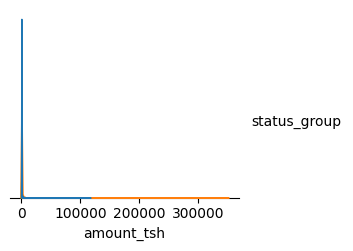

In [18]:
sns.pairplot(data=num_columns.join(data["status_group"]), hue="status_group", markers=["o", "D", "P"], corner=True)

## Preprocessing for ML

In [19]:
data.head(5)

,status_group,amount_tsh,gps_height,num_private,population,construction_year,extraction_type,extraction_type_group,extraction_type_class,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,
0,non functional,0.0,0,0,0,0,afridev,afridev,handpump,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,functional,0.0,1978,0,20,2008,other - rope pump,rope pump,rope pump,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,functional,0.0,0,0,0,0,mono,mono,motorpump,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,functional,10.0,1639,0,25,1999,gravity,gravity,gravity,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,non functional,0.0,0,0,0,0,nira/tanira,nira/tanira,handpump,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


Lets do LabelEncoder

In [20]:
# Preprocessing for categorical data
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for i in object_columns.columns:
  data[i]= label_encoder.fit_transform(data[i])

In [21]:
data.head(5)

,status_group,amount_tsh,gps_height,num_private,population,construction_year,extraction_type,extraction_type_group,extraction_type_class,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,
0,2,0.0,0,0,0,0,0,0,1,6,6,3,3,1,1,7,5,0,4,3
1,0,0.0,1978,0,20,2008,12,9,4,0,2,6,2,1,1,7,5,0,4,3
2,0,0.0,0,0,0,0,7,4,2,4,5,6,2,2,2,3,0,0,2,1
3,0,10.0,1639,0,25,1999,3,1,0,4,5,6,2,1,1,8,6,0,1,1
4,2,0.0,0,0,0,0,8,5,1,6,6,6,2,0,0,7,5,0,4,3


In [22]:
ds.missing_zero_values_table(data)

Your selected dataframe has 20 columns and 59399 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [23]:
#Splitting data into train and test parts.
from sklearn.model_selection import train_test_split, GridSearchCV

X, y = data.drop("status_group", axis=1), data["status_group"]

In [24]:
X.head()

,amount_tsh,gps_height,num_private,population,construction_year,extraction_type,extraction_type_group,extraction_type_class,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,
0,0.0,0,0,0,0,0,0,1,6,6,3,3,1,1,7,5,0,4,3
1,0.0,1978,0,20,2008,12,9,4,0,2,6,2,1,1,7,5,0,4,3
2,0.0,0,0,0,0,7,4,2,4,5,6,2,2,2,3,0,0,2,1
3,10.0,1639,0,25,1999,3,1,0,4,5,6,2,1,1,8,6,0,1,1
4,0.0,0,0,0,0,8,5,1,6,6,6,2,0,0,7,5,0,4,3


<Axes: >

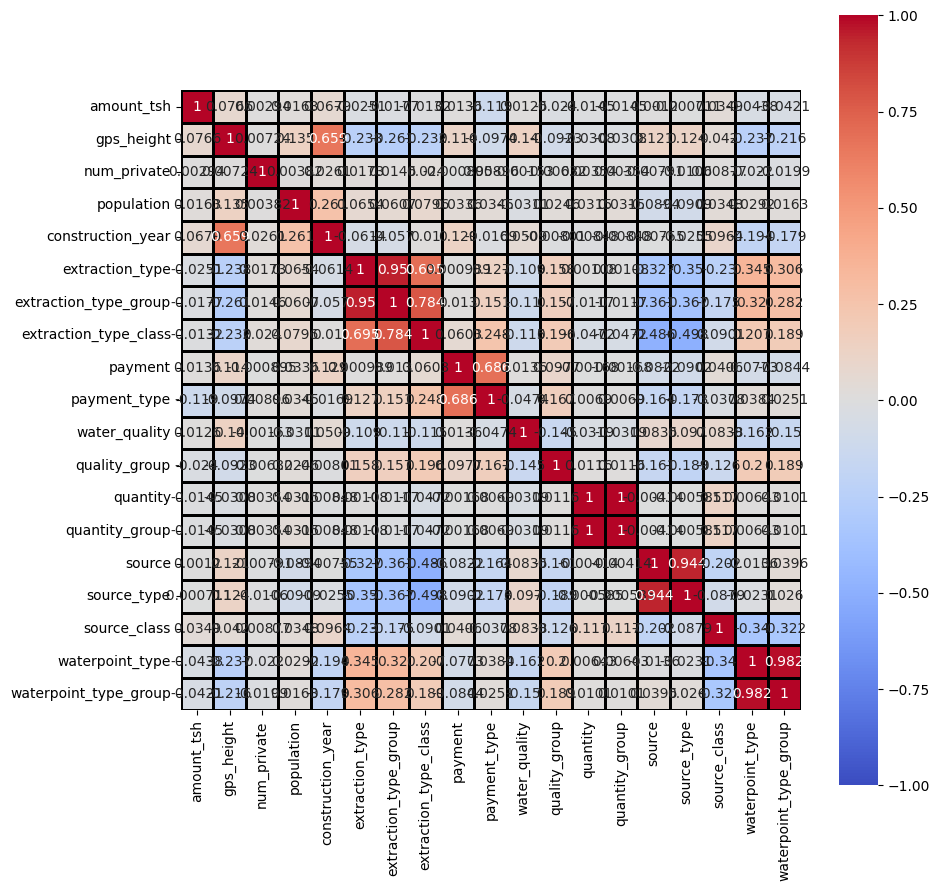

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(),fmt = '.3g',square=True, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

## Lets delete features with correlation more then 0.8

In [26]:
to_del_features = ["extraction_type_group", "extraction_type_class", "quantity_group", "source_type", \
                   "waterpoint_type_group"]

X.drop(columns= to_del_features, axis=1, inplace=True)

<Axes: >

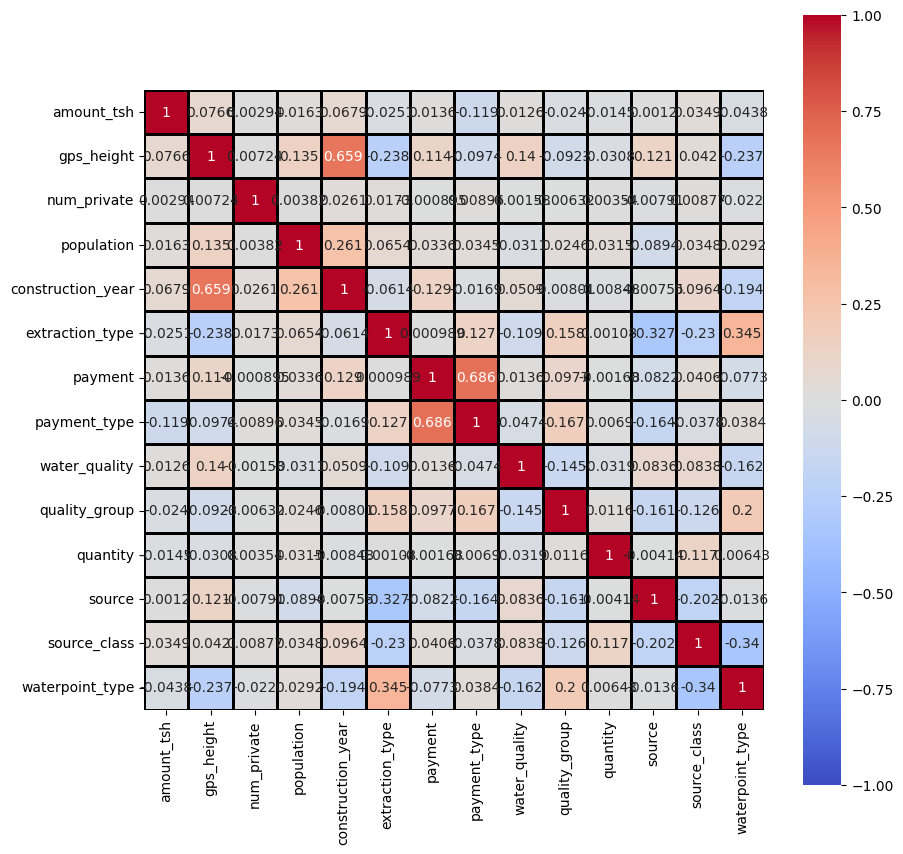

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(),fmt = '.3g',square=True, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

Now we don't have useless columns.

In [28]:

# Use sklearn.model_selection.train_test_split with test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
#Normalization of NUMERICAL data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[list(num_columns)] = scaler.fit_transform(X_train[list(num_columns)])
X_test[list(num_columns)] = scaler.fit_transform(X_test[list(num_columns)])

In [30]:
X_train.head(5)

,amount_tsh,gps_height,num_private,population,construction_year,extraction_type,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,
36223,0.000014,1093,0,25,2007,3,4,5,6,2,1,6,1,1
36628,0.000000,30,0,200,2004,8,0,2,6,2,3,7,0,4
41856,0.000000,0,0,0,0,8,0,2,6,2,2,7,0,4
51877,0.000000,2191,0,465,1992,3,0,2,6,2,1,8,0,1
5032,0.000000,0,0,0,0,3,5,3,6,2,2,6,1,1


**Preparing X (features value)**

**Preparing Y (target value)**

Check if data balanced or not

In [31]:
y.head()

id
0    2
1    0
2    0
3    0
4    2
Name: status_group, dtype: int32

In [32]:
y.value_counts()/len(y)

0    0.543090
2    0.384232
1    0.072678
Name: status_group, dtype: float64

Here we can see 3 classes. There is great disbalance.

In [33]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [34]:
X.head()

,amount_tsh,gps_height,num_private,population,construction_year,extraction_type,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,
0,0.0,0,0,0,0,0,6,6,3,3,1,7,0,4
1,0.0,1978,0,20,2008,12,0,2,6,2,1,7,0,4
2,0.0,0,0,0,0,7,4,5,6,2,2,3,0,2
3,10.0,1639,0,25,1999,3,4,5,6,2,1,8,0,1
4,0.0,0,0,0,0,8,6,6,6,2,0,7,0,4


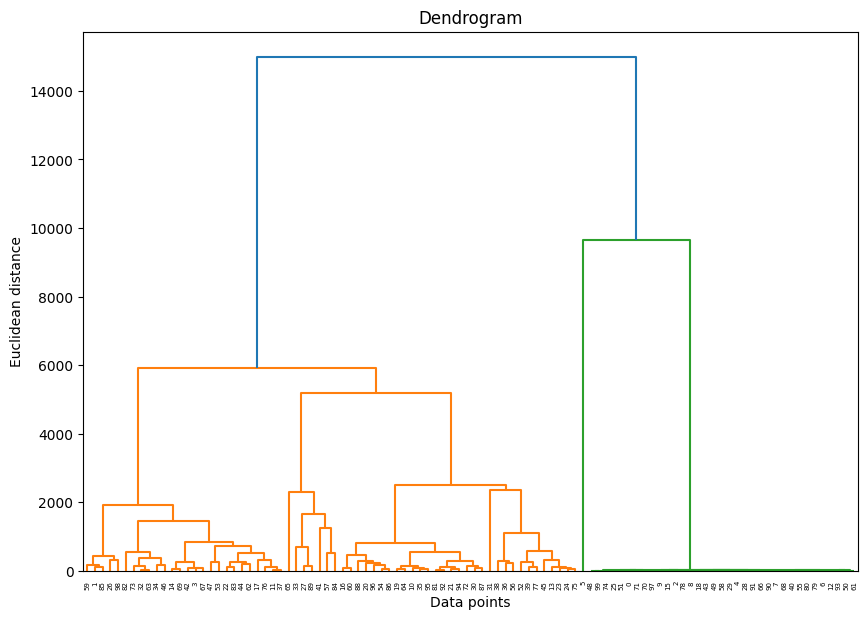

In [35]:
subset_df = X.iloc[:100]

plt.figure(figsize=(10, 7))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(subset_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

## 4. Learning different models

Lets try RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
SEED = 42
params = [
    {
        'n_estimators': np.arange(10, 200, 20),
        'max_depth': np.arange(2, 25, 1),
    }
]
model = RandomForestClassifier(random_state=SEED)


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score

In [38]:
%%time
log_reg = GridSearchCV(model, params, scoring='r2' ,cv=5, n_jobs = -1, verbose=25)
log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 230 candidates, totalling 1150 fits
CPU times: total: 10.6 s
Wall time: 9min 59s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                          'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])}],
             scoring='r2', verbose=25)

In [39]:
print(log_reg.best_estimator_)
print('best parametrs: ', log_reg.best_params_)
predicted_test = log_reg.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(predicted_test, y_test)
print('Accuracy is:', round(accuracy_test,3) )
print('F1_Score is:', round(f1_score(y_test, predicted_test, average='weighted'),3))
model = log_reg.best_estimator_

RandomForestClassifier(max_depth=19, n_estimators=170, random_state=42)
best parametrs:  {'max_depth': 19, 'n_estimators': 170}
Accuracy is: 0.78
F1_Score is: 0.76


Here we can see, that F1 = 0.76

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression()

params = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

log_reg = GridSearchCV(model, params, scoring='r2', cv=5, n_jobs=-1, verbose=False)

log_reg.fit(X_train, y_train)

print(log_reg.best_estimator_)
print('best parameters:', log_reg.best_params_)

predicted_test = log_reg.best_estimator_.predict(X_test)

accuracy_test = accuracy_score(y_test, predicted_test)
f1 = f1_score(y_test, predicted_test, average='weighted')

print('Accuracy is:', round(accuracy_test, 3))
print('F1_Score is:', round(f1, 3))
model = log_reg.best_estimator_

LogisticRegression(C=0.1)
best parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy is: 0.614
F1_Score is: 0.573


In [42]:
#!pip install hyperopt

In [45]:
import xgboost as xgb #tree-based model
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [46]:
xgb_model = xgb.XGBClassifier()

## Find the best hyperparameters

In [47]:
space = {'objective': "multi:softprob",
         'num_classes':3,
         'max_depth': hp.quniform("max_depth", 3, 18, 1),
         'gamma': hp.uniform ('gamma', 1,9),
         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
         'n_estimators': 180,
         'seed': 0
        }

In [48]:
def objective(space):

    clf=xgb.XGBClassifier(objective=space['objective'], num_classes=int(space['num_classes']),
        n_estimators=space['n_estimators'], max_depth = int(space['max_depth']), \
        gamma=space['gamma'],reg_alpha = int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']), colsample_bytree=int(space['colsample_bytree']))

    evaluation = [(X_train, y_train), (X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    # print ("SCORE:", accuracy, "RMSE:", mean_squared_error(pred, y_test, squared=False), end='\n\n')
    return {'loss': -accuracy, 'status': STATUS_OK }

In [49]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|█████████████████████████████████████████████| 100/100 [03:29<00:00,  2.10s/trial, best loss: -0.5196408529741863]


In [50]:
print("The best hyperparameters are :", best_hyperparams)

The best hyperparameters are : {'colsample_bytree': 0.6675644541311797, 'gamma': 8.729899522842958, 'max_depth': 17.0, 'min_child_weight': 6.0, 'reg_alpha': 175.0, 'reg_lambda': 0.35531368691357257}


## Test and thrain with best hyperparameters

In [51]:
space = {'objective': "multi:softmax",
         'num_classes':3,
         'max_depth': 8,
         'gamma': 8.095966646634324,
         'reg_alpha' : 173,
         'reg_lambda' : 0.07151147680924227,
         'colsample_bytree' : 0.8477558472920539,
         'min_child_weight' : 0,
         'n_estimators': 180,
         'seed': 0
        }

In [52]:
clf=xgb.XGBClassifier(objective=space['objective'], num_classes=int(space['num_classes']),
        n_estimators=space['n_estimators'], max_depth = int(space['max_depth']), \
        gamma=space['gamma'],reg_alpha = int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']), colsample_bytree=int(space['colsample_bytree']))

evaluation = [(X_train, y_train), (X_test, y_test)]

clf.fit(X_train, y_train,
        eval_set=evaluation, eval_metric="auc",
        early_stopping_rounds=10,verbose=False)

pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print ("SCORE:", accuracy, "RMSE:", mean_squared_error(pred, y_test, squared=False), end='\n\n')
print("F1_Score is:", f1_score(y_test, pred, average='weighted'))

SCORE: 0.519023569023569 RMSE: 0.9501609527544107

F1_Score is: 0.6848494843164187


## Result

RandomForestClassifier(max_depth=19, n_estimators=170, random_state=42) is the best model with  F1 = 0.76.

**Our model is able to predict the water point state with acceptable accuracy. This will definitely help to improve the quality of services offered by the service company, reduce costs and achieve further development of the company.**